# 1. Set up and module installation

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [197]:
#load our cleaned data in

In [198]:
data_path = "data/02_cleaned_data.csv"

In [199]:
data = pd.read_csv(data_path)

In [200]:
data.head()

,Unnamed: 0,femaleh,hhsize,rural,Low_education,Low_income,Sumatra,Java and Bali,Kalimantan,Sulawesi,Childlabour_05,age_0t6,age_7t12,age_13t15,age_16t18,age_19t60,age_61,Childlabour_06
0,0,0,10,1,1.0,1.0,1,0,0,0,0,0.0,0.000000,0.100000,0.200000,0.700000,0.0,0
1,1,0,7,1,1.0,1.0,1,0,0,0,0,0.0,0.142857,0.000000,0.142857,0.714286,0.0,1
2,2,0,6,1,1.0,1.0,1,0,0,0,1,0.0,0.333333,0.166667,0.166667,0.333333,0.0,0
3,3,0,5,0,1.0,0.0,1,0,0,0,1,0.0,0.000000,0.000000,0.400000,0.600000,0.0,1
4,4,0,3,0,1.0,0.0,1,0,0,0,0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0


In [201]:
data=data.drop(["Unnamed: 0"], axis=1)

In [202]:
data.head()

,femaleh,hhsize,rural,Low_education,Low_income,Sumatra,Java and Bali,Kalimantan,Sulawesi,Childlabour_05,age_0t6,age_7t12,age_13t15,age_16t18,age_19t60,age_61,Childlabour_06
0,0,10,1,1.0,1.0,1,0,0,0,0,0.0,0.000000,0.100000,0.200000,0.700000,0.0,0
1,0,7,1,1.0,1.0,1,0,0,0,0,0.0,0.142857,0.000000,0.142857,0.714286,0.0,1
2,0,6,1,1.0,1.0,1,0,0,0,1,0.0,0.333333,0.166667,0.166667,0.333333,0.0,0
3,0,5,0,1.0,0.0,1,0,0,0,1,0.0,0.000000,0.000000,0.400000,0.600000,0.0,1
4,0,3,0,1.0,0.0,1,0,0,0,0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0


# 2. Get test and train splits, scale data

In [203]:
# Assign X (data) and y (target), reshape the y array
X = data.drop(["Childlabour_06"], axis=1)
y = data["Childlabour_06"]
print(X.shape, y.shape)

(4353, 16) (4353,)


In [204]:
#Split our data into training and testing

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [207]:
type(X_test)

pandas.core.frame.DataFrame

In [208]:
X_test.shape

(1089, 16)

In [209]:
X_train.shape

(3264, 16)

In [210]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 10000)
classifier

LogisticRegression(max_iter=10000)

In [211]:
#Fit (train) or model using the training data

In [212]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# 3. Check model fit

In [213]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9384191176470589
Testing Data Score: 0.9403122130394858


In [214]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [215]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1084,0,0
1085,0,1
1086,0,0
1087,0,0


# 4. Analysis of first model

In [216]:
#Let's get a statistical summary of our logistic model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.175908
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.220     
Dependent Variable: Childlabour_06   AIC:              1563.4512 
Date:               2020-10-29 01:15 BIC:              1665.5092 
No. Observations:   4353             Log-Likelihood:   -765.73   
Df Model:           15               LL-Null:          -981.98   
Df Residuals:       4337             LLR p-value:      9.9903e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
femaleh           0.1430   0.2593   0.5516 0.5812 -0.3652  0.6513
hhsize            0.1204   0.0462   2.6046 0.0092  0.0298  0.2111


In [217]:
#Hmmmmm... Low r-squared score. Damn
#Consider scaling household size?

In [218]:
#confusion matrix

In [219]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[1017   10]
 [  55    7]]


In [220]:
# Referring to documentation www.scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#the confusion matrix returns an output array as below for a binary target variable:
#  [(tn, fp, 
 #   fn, tp)]
    

In [221]:
#So the confusion matrix tells us of 1089 predictions in the X_test and y_test data set, there were 1014 True Negative results, 
#and 7 True Positives for a total of 1021 correct predictions


In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1027
           1       0.41      0.11      0.18        62

    accuracy                           0.94      1089
   macro avg       0.68      0.55      0.57      1089
weighted avg       0.92      0.94      0.92      1089



In [223]:
#So overall our initial model doesn't seem that great.
#We can implement some changes to make it work better

# 5. Implementing k-folds cross validation

In [224]:
# 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std

In [225]:
# 
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores_kfold = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_kfold), std(scores_kfold)))


Accuracy: 0.938 (0.006)


In [226]:
# 
y_pred = cross_val_predict(classifier, X, y, cv=cv, n_jobs=-1)
conf_mat_kfold = confusion_matrix(y, y_pred)
conf_mat_kfold

array([[4063,   31],
       [ 237,   22]], dtype=int64)

In [227]:
# 
classification_report_kfold=classification_report(y, y_pred)
print(classification_report_kfold)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4094
           1       0.42      0.08      0.14       259

    accuracy                           0.94      4353
   macro avg       0.68      0.54      0.55      4353
weighted avg       0.91      0.94      0.92      4353



In [228]:
# 
#Hmmm, interesting. So it seems recall has actually fallen slightly, whilst precision has increased. 
#Overall F1 and accuracy seems unchanged.
#This is likely because of the highly imbalanced nature of the data set- kfolds cross validation fails on highly imbalanced datasets
#To retify this we will create stratified k-fold cross-validation

# 6. Stratified k-fold cross validation

In [229]:
from sklearn.model_selection import StratifiedKFold

In [230]:
kstrat = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [231]:
# evaluate model
scores_kstrat = cross_val_score(classifier, X, y, scoring='accuracy', cv=kstrat, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_kstrat), std(scores_kstrat)))


Accuracy: 0.938 (0.001)


In [232]:
y_pred = cross_val_predict(classifier, X, y, cv=kstrat, n_jobs=-1)
conf_mat_kstrat = confusion_matrix(y, y_pred)
conf_mat_kstrat

array([[4064,   30],
       [ 238,   21]], dtype=int64)

In [233]:
classification_report_kstrat=classification_report(y, y_pred)
print(classification_report_kstrat)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4094
           1       0.41      0.08      0.14       259

    accuracy                           0.94      4353
   macro avg       0.68      0.54      0.55      4353
weighted avg       0.91      0.94      0.92      4353



In [234]:
#So k-stratification didn't seem to help that much.
#Whilst we have ensured that there are an equal amount of y=1 observations in all our splits, still high imbalanced data set.
#So, we have tried to deal with imbalanced data by stratified sampling, but our data just seems too imbalanced to really fix this.
#So in our next step, we will attempt to train the model with more observation where y=1

# 7. Second model, using SMOTE

In [235]:
#Our quite bad at actually correctly identifying/predicting households where children go on to enter the labour market.
#This is likely due to the highly imblanced dataset we are using. We have tried k-folds cross validation, but this does not seem to have helped much
#Recalling our Exploratory Data Analysis only 5% of households actually have household labour- according to our survey earlier

In [236]:
from imblearn.over_sampling import SMOTE

In [237]:
os = SMOTE(random_state=0)


In [238]:
y_train.value_counts()

0    3067
1     197
Name: Childlabour_06, dtype: int64

In [239]:
smt = SMOTE()
X_train_os, y_train_os = smt.fit_sample(X_train, y_train)

In [240]:
np.bincount(y_train_os)

array([3067, 3067], dtype=int64)

In [241]:
#We now have perfectly balanced sample sizes in our training data set

In [242]:
classifier.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=10000)

In [243]:
print(f"Training Data Score: {classifier.score(X_train_os, y_train_os)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7817085099445712
Testing Data Score: 0.7667584940312213


In [244]:
predictions = classifier.predict(X_test)

In [245]:
type(predictions)

numpy.ndarray

In [246]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1027
           1       0.16      0.74      0.27        62

    accuracy                           0.77      1089
   macro avg       0.57      0.76      0.56      1089
weighted avg       0.93      0.77      0.83      1089



In [247]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[789 238]
 [ 16  46]]


In [248]:
#Hmmm, so our accuracy and our precision have decreased somewhat, 
#However, we are picking up more true positives and our recall has improved after using SMOTE, without too much decrease in F1 score

In [249]:
#Let's get a statistical summary of our logistic model
import statsmodels.api as sm
logit_model2=sm.Logit(y_train_os, X_train_os)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.471351
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.320    
Dependent Variable: Childlabour_06   AIC:              5814.5292
Date:               2020-10-29 01:16 BIC:              5922.0748
No. Observations:   6134             Log-Likelihood:   -2891.3  
Df Model:           15               LL-Null:          -4251.8  
Df Residuals:       6118             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
femaleh         -1.1554   0.1611  -7.1700 0.0000 -1.4713 -0.8396
hhsize           0.1020   0.0237   4.3011 0.0000  0.0555  0.1485
rural        

# 8. Combining SMOTE and repeated K-folds validation

In [250]:
#So our minority over-sampling approach using SMOTE seemed to work well.
#Now that we have balanced data, we can also be a bit more confident that any cross-validation will also likely work better
#Let's see if we can't combine repeated kfolds validation and SMOTE to get a better model fitting process.

In [251]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [252]:
#We could simply load in our oversampled dataset created in Section 7 and then apply kfolds.
#However, to avoid overfitting we want to split into training and testing folds. 
#and then on each fold we want to oversample, train classifier and then validate
#Happily, we can actually create code that runs this all for us, using pipeline

In [253]:
cv_os = KFold(n_splits=10, random_state=1, shuffle=True)

In [254]:
from imblearn.pipeline import Pipeline, make_pipeline

In [255]:
imb_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression(max_iter = 1000))
cross_val_score(imb_pipeline, X_train, y_train, scoring='recall', cv=cv_os)

array([0.55555556, 0.80952381, 0.57142857, 0.83333333, 0.82608696,
       0.76923077, 0.75      , 0.78947368, 0.63157895, 0.52941176])

In [256]:
result3=imb_pipeline.fit( X_train, y_train)

In [257]:
y_test_os_predict=imb_pipeline.predict(X_test)


In [258]:
y_os_kf_pred=pd.Series(y_test_os_predict)

In [259]:
print(classification_report(y_test, y_os_kf_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1027
           1       0.17      0.76      0.28        62

    accuracy                           0.78      1089
   macro avg       0.58      0.77      0.57      1089
weighted avg       0.94      0.78      0.83      1089



In [260]:
from sklearn.metrics import confusion_matrix
confusion_matrix_hat = confusion_matrix(y_test, y_os_kf_pred)
print(confusion_matrix_hat)

[[798 229]
 [ 15  47]]


In [261]:
print(result3.summary())

AttributeError: 'Pipeline' object has no attribute 'summary'

In [ ]:
#-------------------------------------------------------------------------------------------------------
#What happens if we just use cross-validation on previously created over-sampled datset?

In [ ]:
# prepare the cross-validation procedure
hat2 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
logreg=LogisticRegression(max_iter = 1000)
scores_kfold = cross_val_score(logreg, X_train_os, y_train_os, scoring='accuracy', cv=hat2, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_kfold), std(scores_kfold)))

In [ ]:
# 
y_pred_os = cross_val_predict(logreg, X_test, y_test, cv=cv, n_jobs=-1)
conf_mat_hat2 = confusion_matrix(y_test, y_pred_os)
conf_mat_hat2

In [ ]:
# 
classification_report_hat2=classification_report(y_test, y_pred_os)
print(classification_report_hat2)

# 9. Feature Selection using Recursive Feature Elimination

In [262]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [263]:
logreg_rfe = LogisticRegression(max_iter = 1000)

In [264]:
rfe = RFE(logreg_rfe, n_features_to_select=10)

In [265]:
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False  True False  True  True  True
  True  True  True  True]
[3 4 1 1 6 2 5 1 7 1 1 1 1 1 1 1]


In [266]:
# summarize all features
for i in range(X_train_os.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 6.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected False, Rank: 5.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 7.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000


In [267]:
type(X_train_os)

pandas.core.frame.DataFrame

In [268]:
#lets have a look at the 10 columns recommended by RFE

In [269]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(X_train_os.head())

,femaleh,hhsize,rural,Low_education,Low_income,Sumatra,Java and Bali,Kalimantan,Sulawesi,Childlabour_05,age_0t6,age_7t12,age_13t15,age_16t18,age_19t60,age_61
0,0,4,1,1.0,1.0,0,1,0,0,0,0.000000,0.5,0.0,0.0,0.500000,0.0
1,0,4,0,1.0,0.0,1,0,0,0,0,0.000000,0.0,0.0,0.0,1.000000,0.0
2,0,7,0,1.0,0.0,1,0,0,0,0,0.285714,0.0,0.0,0.0,0.714286,0.0
3,0,5,0,1.0,0.0,1,0,0,0,1,0.000000,0.4,0.0,0.2,0.400000,0.0
4,0,5,0,0.0,0.0,1,0,0,0,0,0.000000,0.2,0.2,0.2,0.400000,0.0


In [270]:
list(X_train_os.columns)

['femaleh',
 'hhsize',
 'rural',
 'Low_education',
 'Low_income',
 'Sumatra',
 'Java and Bali',
 'Kalimantan',
 'Sulawesi',
 'Childlabour_05',
 'age_0t6',
 'age_7t12',
 'age_13t15',
 'age_16t18',
 'age_19t60',
 'age_61']

In [271]:
X_train_os.iloc[:, [2,3,7,9,10,11,12,13,14,15]].head()

,rural,Low_education,Kalimantan,Childlabour_05,age_0t6,age_7t12,age_13t15,age_16t18,age_19t60,age_61
0,1,1.0,0,0,0.000000,0.5,0.0,0.0,0.500000,0.0
1,0,1.0,0,0,0.000000,0.0,0.0,0.0,1.000000,0.0
2,0,1.0,0,0,0.285714,0.0,0.0,0.0,0.714286,0.0
3,0,1.0,0,1,0.000000,0.4,0.0,0.2,0.400000,0.0
4,0,0.0,0,0,0.000000,0.2,0.2,0.2,0.400000,0.0


In [272]:
top_cols=["rural", "Low_education", "Kalimantan", "Childlabour_05","age_0t6", "age_7t12", "age_13t15", "age_16t18", "age_19t60", "age_61" ]

In [273]:
X_top=X_train_os[top_cols]
y_top=y_train_os

In [274]:
top_model=sm.Logit(y,X)
top_result=top_model.fit()
print(top_result.summary2())

Optimization terminated successfully.
         Current function value: 0.175908
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.220     
Dependent Variable: Childlabour_06   AIC:              1563.4512 
Date:               2020-10-29 01:17 BIC:              1665.5092 
No. Observations:   4353             Log-Likelihood:   -765.73   
Df Model:           15               LL-Null:          -981.98   
Df Residuals:       4337             LLR p-value:      9.9903e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
femaleh           0.1430   0.2593   0.5516 0.5812 -0.3652  0.6513
hhsize            0.1204   0.0462   2.6046 0.0092  0.0298  0.2111


In [275]:
top_model=LogisticRegression(max_iter = 1000)
top_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [276]:
y_pred_top=top_model.predict(X_test)

In [277]:
conf_mat_top = confusion_matrix(y_test, y_pred_top)
conf_mat_top

array([[1017,   10],
       [  55,    7]], dtype=int64)

In [278]:
print(classification_report(y_test, y_pred_top))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1027
           1       0.41      0.11      0.18        62

    accuracy                           0.94      1089
   macro avg       0.68      0.55      0.57      1089
weighted avg       0.92      0.94      0.92      1089



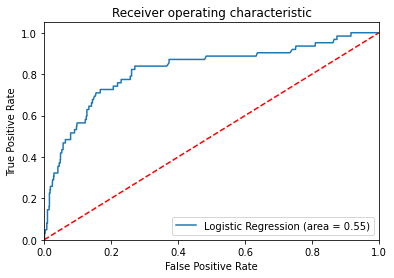

In [279]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, top_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, top_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 10. Conclusion

In [ ]:
#In conclusion version of model in section 8. Combining SMOTE and repeated K-folds validation,
#seems to offer the best model results with a trade off of slightly lower accuracy for significantly improved recall.